# Integraci√≥n de Datasets

Realizado por:
- Paula Monge
- Emmanuel Z√∫√±iga

Trabajo de Invetigaci√≥n del Curso:
- Investigaci√≥n en Ciencias de la Computaci√≥n

Tema de Investigaci√≥n:
- Aprendizaje Autom√°tico en la clasificaci√≥n de Sentimientos en Twitter: Comparaci√≥n de los Algoritmos de LSTM Bidireccional, BERT y Na√Øve Bayes.

El presente notebook implementa una integraci√≥n entre algunos datasets que podr√≠an ser √∫tiles. Para ello se hace una transformaci√≥n de los datasets seleccionados al formato .csv, y la transformaci√≥n a las clases respectivos: positive, negative, litigious, uncertainty

## Carga de librerias üìö

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Carga de los datasets

In [ ]:
from google.colab import drive

# Se carga la libreria drive de google para cargar los archivos almacenados en drive
drive.mount("/content/gdrive")

# El dataset en cuesti√≥n contiene datos sobre tweets en diferentes idiomas, pero nos interesa utilizar solo
# los que se encuentran en espa√±ol.
dataset_1 = pd.read_csv('/content/gdrive/My Drive/tweets.csv').query('Language == "es"')

# Los dem√°s datasets han sido procesados para adaptar el formato del dataset original

dataset_2 = pd.read_csv('/content/gdrive/My Drive/tass_dataset_1.csv')

dataset_3 = pd.read_csv('/content/gdrive/My Drive/tass_dataset_2.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Verificaci√≥n de los datasets üìÖ

In [ ]:
# Primer dataset 
dataset_1.head(10)

Text Language      Label
1    #BadBunny: Como dos gotas de agua: Joven se di...       es   negative
36   @alitomorenoc No mames, ya mejor l√°rgate del P...       es  litigious
173  Good MEWning ‚ô•Ô∏èüêº‚ô•Ô∏è\nUn nuevo amanecer,un nuevo...       es   positive
330  criminal por robarme el coraz√≥n https://t.co/O...       es  litigious
455  @isiupdates Pantera \n#IsiVives #IsiVivesCHILE...       es   positive
556  Os quiero recordar y hacer saber a los que a√∫n...       es   positive
572  @Orlando71156528 Y sin embargo un criminal de ...       es  litigious
702  @Fergus0055 No ser√≠a porque los t√≥xicos de xbo...       es   positive
812                         @loonalendaskk ahh q legal       es  litigious
823  @JesusRCuevas @lopezobrador_ Pues no lamenta l...       es  litigious

In [ ]:
dataset_2.head(10)

Unnamed: 0                                               Text        Label
0           0        Salgo de #VeoTV , que d√≠a m√°s largoooooo...  uncertainty
1           1  @PauladeLasHeras No te libraras de ayudar me/n...    litigious
2           2                          @marodriguezb Gracias MAR    litigious
3           3  Off pensando en el regalito Sinde, la que se v...     positive
4           4  Conozco a alguien q es adicto al drama! Ja ja ...     positive
5           5  RT @FabHddzC: Si amas a alguien, d√©jalo libre....     negative
6           6  Toca @crackoviadeTV3 . Grabaci√≥n dl especial N...     negative
7           7  Hoy asisitir√© en Madrid a un seminario sobre l...     negative
8           8  Buen d√≠a todos! Lo primero mandar un abrazo gr...     positive
9           9  Desde el esca√±o. Todo listo para empezar #endi...  uncertainty

In [ ]:
dataset_3.head(10)

Unnamed: 0                                               Text        Label
0           0  -Me caes muy bien -Tienes que jugar m√°s partid...  uncertainty
1           1  @myendlesshazza a. que puto mal escribob. me s...     negative
2           2  @estherct209 jajajaja la tuya y la d mucha gen...     negative
3           3  Quiero mogoll√≥n a @AlbaBenito99 pero sobretodo...     positive
4           4  Vale he visto la tia bebiendose su regla y me ...     negative
5           5  @Yulian_Poe @guillermoterry1 Ah. mucho m√°s por...     positive
6           6  Se ha terminado #Rio2016 Lamentablemente no ar...     negative
7           7  11. siiii fue super gracioso teniamos que habe...     positive
8           8  @toNi_end seria mejor que dejasen de emitir es...     negative
9           9  @jonoro96 te mandaria a comprarte un burro, pe...     negative

## Integraci√≥n de los datasets üîó

In [ ]:
dataset_1 = dataset_1.drop('Language', axis = 1)

In [ ]:
dataset_1.head(10)

Text      Label
1    #BadBunny: Como dos gotas de agua: Joven se di...   negative
36   @alitomorenoc No mames, ya mejor l√°rgate del P...  litigious
173  Good MEWning ‚ô•Ô∏èüêº‚ô•Ô∏è\nUn nuevo amanecer,un nuevo...   positive
330  criminal por robarme el coraz√≥n https://t.co/O...  litigious
455  @isiupdates Pantera \n#IsiVives #IsiVivesCHILE...   positive
556  Os quiero recordar y hacer saber a los que a√∫n...   positive
572  @Orlando71156528 Y sin embargo un criminal de ...  litigious
702  @Fergus0055 No ser√≠a porque los t√≥xicos de xbo...   positive
812                         @loonalendaskk ahh q legal  litigious
823  @JesusRCuevas @lopezobrador_ Pues no lamenta l...  litigious

In [ ]:
dataset_2 = dataset_2.drop('Unnamed: 0', axis = 1)

In [ ]:
dataset_2.head(10)

Text        Label
0        Salgo de #VeoTV , que d√≠a m√°s largoooooo...  uncertainty
1  @PauladeLasHeras No te libraras de ayudar me/n...    litigious
2                          @marodriguezb Gracias MAR    litigious
3  Off pensando en el regalito Sinde, la que se v...     positive
4  Conozco a alguien q es adicto al drama! Ja ja ...     positive
5  RT @FabHddzC: Si amas a alguien, d√©jalo libre....     negative
6  Toca @crackoviadeTV3 . Grabaci√≥n dl especial N...     negative
7  Hoy asisitir√© en Madrid a un seminario sobre l...     negative
8  Buen d√≠a todos! Lo primero mandar un abrazo gr...     positive
9  Desde el esca√±o. Todo listo para empezar #endi...  uncertainty

In [ ]:
dataset_3 = dataset_3.drop('Unnamed: 0', axis = 1)

In [ ]:
## Concatenaci√≥n de los datasets
concatenated_df = pd.concat([dataset_1, dataset_2, dataset_3])

In [ ]:
concatenated_df.shape

(19560, 2)

## An√°lisis Exploratorio üìä

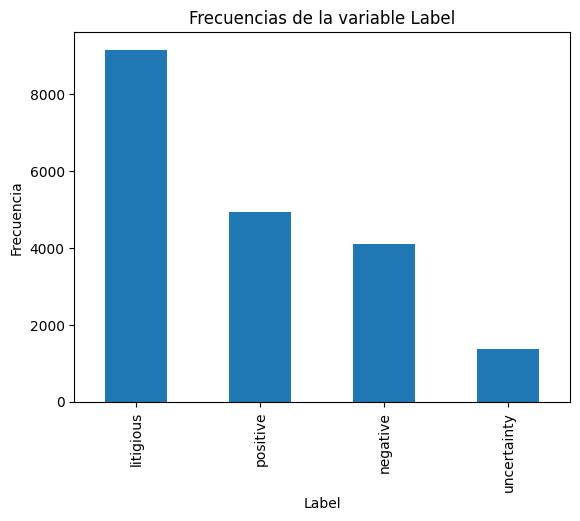

In [ ]:
# Generamos un histograma de la variable categ√≥rica 'Label'
# Contar las ocurrencias de cada valor en la columna 'Categoria'
frecuencias = concatenated_df['Label'].value_counts()

# Generar el histograma de frecuencias
frecuencias.plot(kind='bar')

# Personalizar el gr√°fico
plt.title('Frecuencias de la variable Label')
plt.xlabel('Label')
plt.ylabel('Frecuencia')

# Mostrar el gr√°fico
plt.show()

In [ ]:
# Filtramos el dataset para seleccionar los registros que cumplen el valor en la columna en cuesti√≥n
data_filtrado = concatenated_df[concatenated_df['Label'] == 'litigious']

# Seleccionamos aleatoriamente 4000 registros de los que cumplen ese valor
registros_borrar = data_filtrado.sample(n=4000)

# Borramos los registros seleccionados
copia = concatenated_df
dataset = concatenated_df.drop(registros_borrar.index)

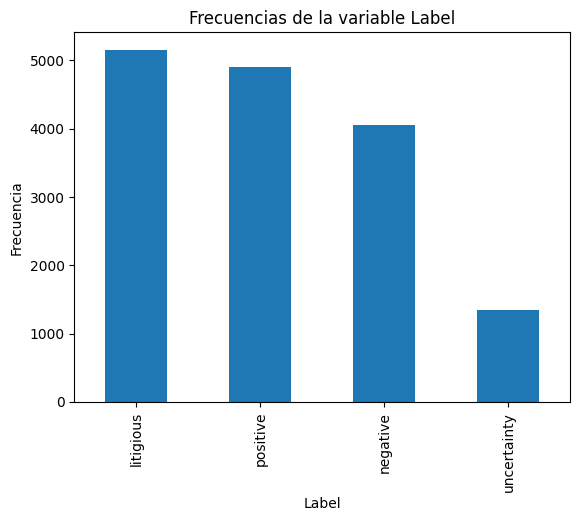

In [ ]:
# Generamos un histograma de la variable categ√≥rica 'Label'
# Contar las ocurrencias de cada valor en la columna 'Categoria'
frecuencias = dataset['Label'].value_counts()

# Generar el histograma de frecuencias
frecuencias.plot(kind='bar')

# Personalizar el gr√°fico
plt.title('Frecuencias de la variable Label')
plt.xlabel('Label')
plt.ylabel('Frecuencia')

# Mostrar el gr√°fico
plt.show()

## Guardado del Dataset ‚úç

In [ ]:
# Montar el drive
drive.mount('/content/drive')

# Guardar el dataset en un archivo CSV en tu drive
concatenated_df.to_csv('/content/drive/My Drive/integrated_dataset.csv', index=True)

Mounted at /content/drive
